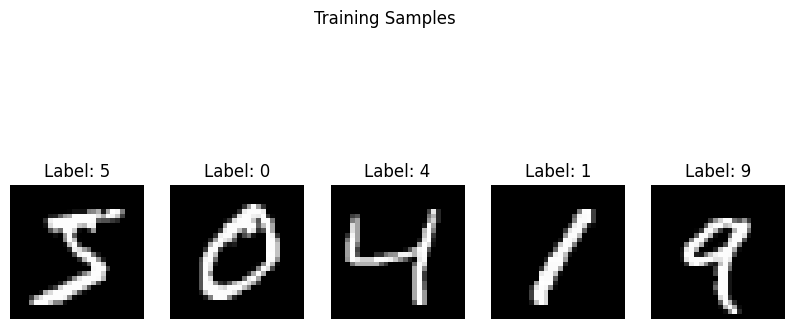

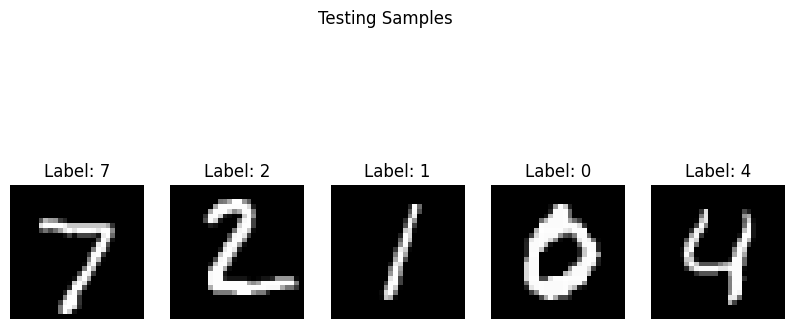

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load and preprocess the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define a function to plot samples with labels
def plot_samples(images, labels, class_names, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {class_names[labels[i]]}")
        plt.axis('off')

# Define class names for MNIST (digits 0-9)
class_names = [str(i) for i in range(10)]

# Plot a few training samples
plot_samples(train_images, train_labels, class_names, num_samples=5)
plt.suptitle('Training Samples')
plt.show()

# Plot a few testing samples
plot_samples(test_images, test_labels, class_names, num_samples=5)
plt.suptitle('Testing Samples')
plt.show()


In [4]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the Sequential model
model = keras.Sequential([
    # Flatten the 28x28 input images to a 1D array (784 elements)
    layers.Flatten(input_shape=(28, 28)),
    
    # Add a dense (fully connected) layer with 128 units and ReLU activation
    layers.Dense(128, activation='relu'),
     # Add a dense (fully connected) layer with 64 units and ReLU activation
    layers.Dense(64, activation='relu'),
    
    # Add another dense layer with 10 units (one for each digit) and softmax activation
    layers.Dense(10, activation='softmax')
])

learning_rate=0.0001

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
#optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.5)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Train the model and collect training history

history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, verbose=2)



Epoch 1/10
1500/1500 - 5s - loss: 0.6552 - accuracy: 0.8328 - val_loss: 0.2871 - val_accuracy: 0.9223
Epoch 2/10
1500/1500 - 4s - loss: 0.2703 - accuracy: 0.9241 - val_loss: 0.2267 - val_accuracy: 0.9373
Epoch 3/10
1500/1500 - 4s - loss: 0.2170 - accuracy: 0.9381 - val_loss: 0.1939 - val_accuracy: 0.9462
Epoch 4/10
1500/1500 - 4s - loss: 0.1843 - accuracy: 0.9470 - val_loss: 0.1737 - val_accuracy: 0.9498
Epoch 5/10
1500/1500 - 4s - loss: 0.1611 - accuracy: 0.9536 - val_loss: 0.1594 - val_accuracy: 0.9556
Epoch 6/10
1500/1500 - 5s - loss: 0.1424 - accuracy: 0.9591 - val_loss: 0.1482 - val_accuracy: 0.9590
Epoch 7/10
1500/1500 - 5s - loss: 0.1282 - accuracy: 0.9630 - val_loss: 0.1401 - val_accuracy: 0.9604
Epoch 8/10
1500/1500 - 5s - loss: 0.1159 - accuracy: 0.9671 - val_loss: 0.1313 - val_accuracy: 0.9629
Epoch 9/10
1500/1500 - 5s - loss: 0.1054 - accuracy: 0.9698 - val_loss: 0.1223 - val_accuracy: 0.9649
Epoch 10/10
1500/1500 - 5s - loss: 0.0965 - accuracy: 0.9729 - val_loss: 0.1227 - 

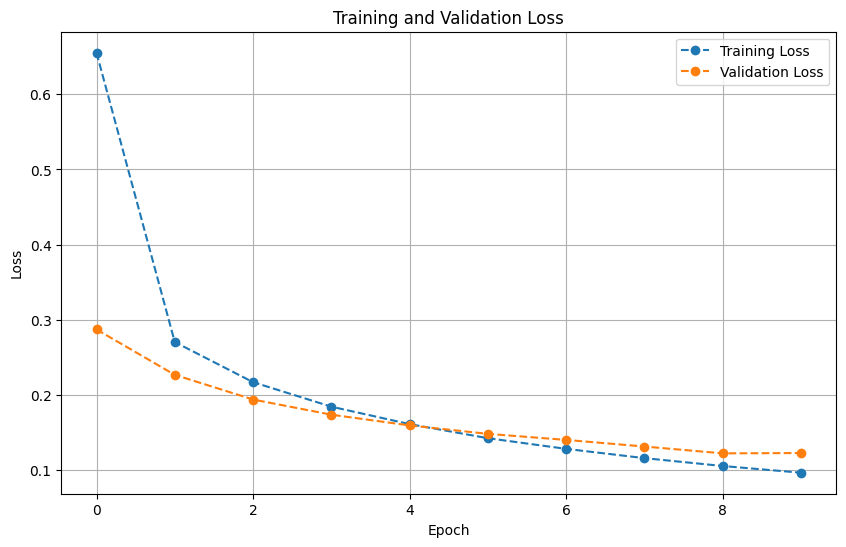

In [6]:


# Plot training, validation, and testing loss with respect to epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



In [7]:
# Evaluate the model on the test data and collect test loss
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.1159 - accuracy: 0.9645
Test Loss: 0.115855373442173
Test Accuracy: 0.9645000100135803


only input and output layer

In [8]:
# Define the Sequential model
model = keras.Sequential([
    # Flatten the 28x28 input images to a 1D array (784 elements)
    layers.Flatten(input_shape=(28, 28)),
    
    
    
    # Add another dense layer with 10 units (one for each digit) and softmax activation
    layers.Dense(10, activation='softmax')
])

learning_rate=0.0005

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.5)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
# Train the model and collect training history

history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2, verbose=2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1500/1500 - 5s - loss: 1.8252 - accuracy: 0.4728 - val_loss: 1.3869 - val_accuracy: 0.7158
Epoch 2/50
1500/1500 - 4s - loss: 1.2030 - accuracy: 0.7494 - val_loss: 1.0126 - val_accuracy: 0.8056
Epoch 3/50
1500/1500 - 5s - loss: 0.9509 - accuracy: 0.7994 - val_loss: 0.8351 - val_accuracy: 0.8341
Epoch 4/50
1500/1500 - 6s - loss: 0.8183 - accuracy: 0.8223 - val_loss: 0.7323 - val_accuracy: 0.8479
Epoch 5/50
1500/1500 - 5s - loss: 0.7359 - accuracy: 0.8360 - val_loss: 0.6651 - val_accuracy: 0.8562
Epoc

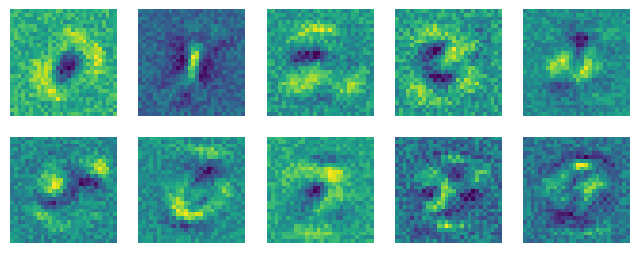

In [11]:
import matplotlib.pyplot as plt

# Get the weights of a specific layer (e.g., the first dense layer)
layer_index = 1  
weights = model.layers[layer_index].get_weights()[0]

# Reshape the weights to match the expected input shape (e.g., for a dense layer)
if len(weights.shape) == 2:
    weights = weights.reshape((28, 28, -1))

# Plot the weights as an image
plt.figure(figsize=(8, 8))
plt.title(f"Weights of Layer {layer_index}")
for i in range(weights.shape[-1]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(weights[:, :, i], cmap='viridis')
    plt.axis('off')

plt.show()
